In [1]:
import pandas as pd

In [2]:
file= pd.read_csv('D:\\Downloads\\Admission_Predict.csv')

In [3]:
file

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
file.drop('Serial No.', axis=1, inplace= True)

In [5]:
file.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
file['Chance of Admit ']= file['Chance of Admit '].apply(lambda x: 1 if x>=0.50 else 0)

In [7]:
file.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [9]:
x= file.drop('Chance of Admit ',axis=1)
y=file['Chance of Admit ']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.25, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc= DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [15]:
yprec= dtc.predict(xtest)
yprec

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
df= pd.DataFrame({'actual':ytest, 'predicted':yprec})

In [17]:
df.head()

,actual,predicted
132,1,1
309,1,1
341,1,1
196,1,1
246,1,1


In [18]:
from sklearn.tree import plot_tree

In [19]:
column= ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

[Text(0.4625, 0.95, 'CGPA <= 7.85\ngini = 0.158\nsamples = 300\nvalue = [26, 274]'),
 Text(0.2, 0.85, 'LOR <= 2.75\ngini = 0.459\nsamples = 28\nvalue = [18, 10]'),
 Text(0.1, 0.75, 'GRE Score <= 301.5\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.05, 0.65, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.15, 0.65, 'CGPA <= 7.655\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.1, 0.55, 'TOEFL Score <= 97.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.05, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15, 0.45, 'GRE Score <= 315.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.1, 0.35, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.75, 'SOP <= 2.75\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.25, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.35, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]

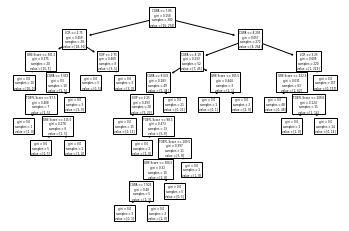

In [20]:
plot_tree(dtc, feature_names= column)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
accuracy_score(ytest, yprec)

0.9

In [23]:
print(classification_report(ytest, yprec))

              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.97      0.92      0.95        93

    accuracy                           0.90       100
   macro avg       0.66      0.75      0.69       100
weighted avg       0.92      0.90      0.91       100

